# TP 2 :  Méthode de Signal Avancées Soustraction Adaptative de Bruit

In [110]:
import sys
from pathlib import Path
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

ROOT = Path.cwd().parents[0]
SRC = ROOT / "src"
if str(SRC) not in sys.path:
    sys.path.append(str(SRC))


import signals_utils
import algoms_LMS
import algoms_RLS


reload(signals_utils)
reload(algoms_LMS)
reload(algoms_RLS)


from signals_utils import generate_test_signals, generate_test_LMS_signals, generate_test_signals_2, generate_test_RLS_signals
from algoms_LMS import algoms_LMS
from algoms_RLS import algoms_RLS

## Partie 1

### 1.3 Validation de l'algorithme RLS

In [111]:
N = 3000
noise_variance = 0.01
variance = 1.0

x, d, h = generate_test_signals(N = N,  variance = variance)
P = len(h)
W, y, e = algoms_RLS(x, d, P, lambda_=0.99, delta = 1000)


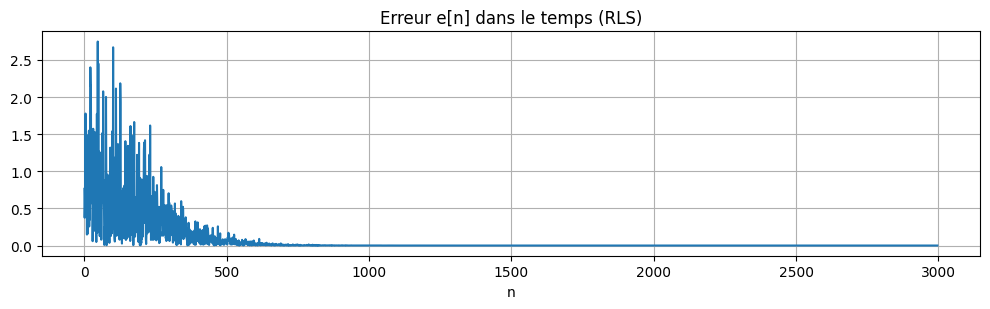

In [112]:
n0 = P - 1
en = e[n0:]


plt.figure(figsize=(10,3.2))
plt.plot(abs(en), label="e[n]")
plt.title("Erreur e[n] dans le temps (RLS)")
plt.xlabel("n")
plt.grid(True); plt.tight_layout(); plt.show()


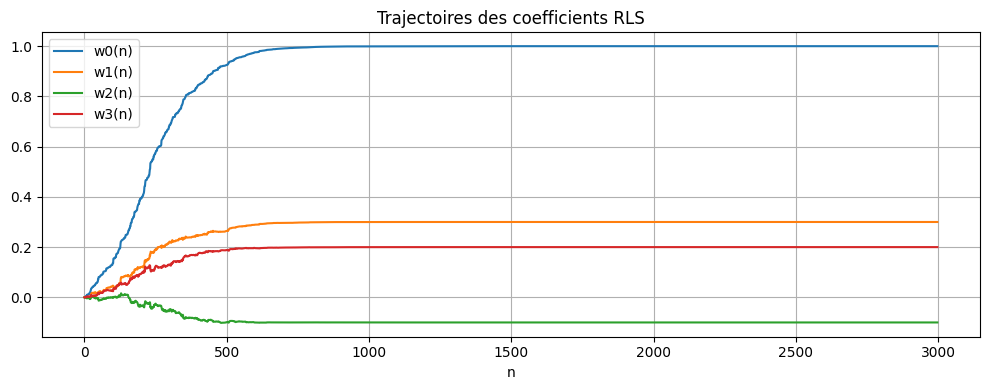

La valeur du filtre h est [ 1.   0.3 -0.1  0.2]


In [113]:
plt.figure(figsize=(10, 4))
W= np.array(W, dtype = float)
for k in range(P):
    plt.plot(W[:, k], label=f"w{k}(n)")


plt.title("Trajectoires des coefficients RLS")
plt.xlabel("n")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("La valeur du filtre h est", h)

In [114]:
P_list = [5, 10]
lambda_list = [0.1, 0.5, 0.9]
n_p = len(P_list)
n_lambda = len(lambda_list)

In [115]:

x_list = []
d_list = []
h_list = []
W_list = []
y_list = []
e_list = []
for i in range(n_p):
    x, d, h = generate_test_LMS_signals(N = N, variance_x = variance, noise_variance = noise_variance, P = P_list[i], frequency = 0.5)
    x_list.append(x)
    d_list.append(d)
    h_list.append(h)
    W, y, e = algoms_RLS(x, d, P_list[i], lambda_=0.99, delta = 1000)
    W_list.append(np.array(W, dtype = float))
    y_list.append(y)
    e_list.append(e)


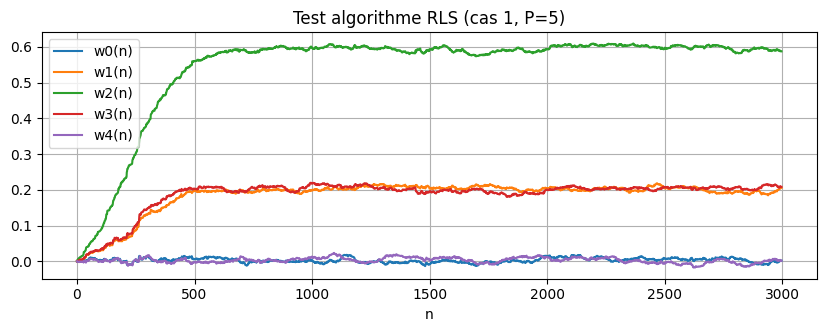

Réponse impulsionnelle utilisée : [1.84796815e-18 2.03712369e-01 5.92575262e-01 2.03712369e-01
 1.84796815e-18]
W final obtenue : [0.00172764 0.20565565 0.58762144 0.2083417  0.00129874]


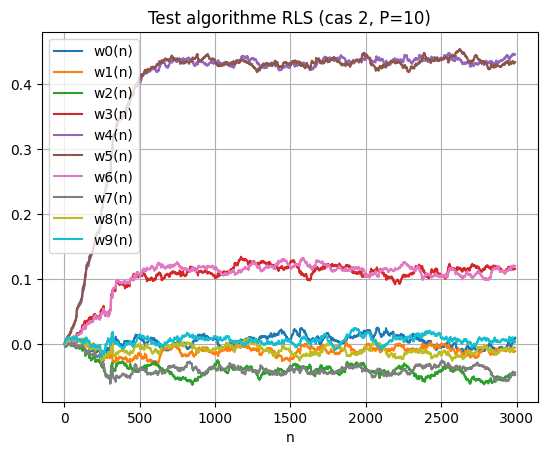

Réponse impulsionnelle utilisée : [ 0.00397185 -0.01197637 -0.0411195   0.11468706  0.43443695  0.43443695
  0.11468706 -0.0411195  -0.01197637  0.00397185]
W final obtenue : [ 0.00988178 -0.01098047 -0.04367691  0.11566641  0.44575727  0.43380327
  0.1203769  -0.0473836  -0.00557985  0.00357444]


In [116]:
plt.figure(figsize=(10,3.2))
for i in range(n_p) :
    W = W_list[i]
    Ti, Pi = W.shape

    for p in range(Pi):
        plt.plot(W[:, p], label=f"w{p}(n)")

    plt.title(f"Test algorithme RLS (cas {i+1}, P={Pi})")
    plt.xlabel("n")
    plt.legend()
    plt.grid(True)
    plt.show()

    print("Réponse impulsionnelle utilisée :", h_list[i])
    print("W final obtenue :", W[-1])

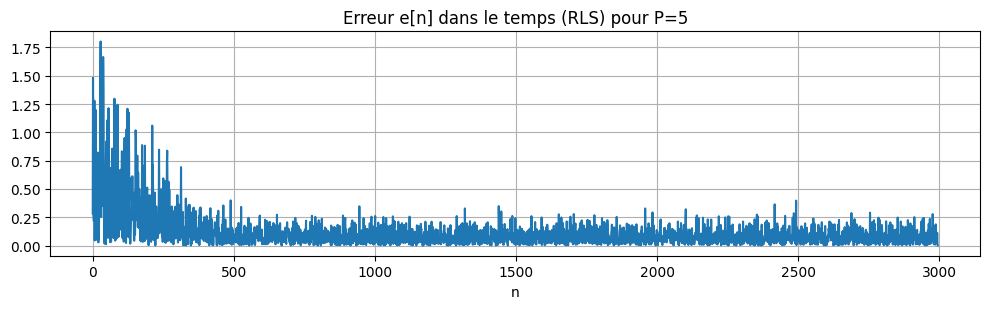

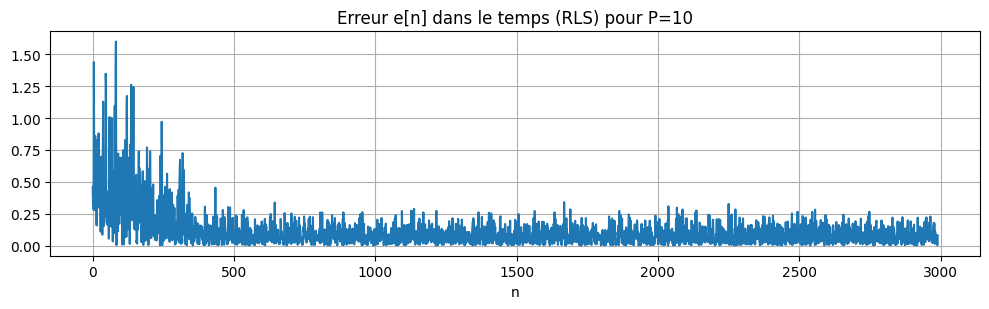

In [117]:
for i in range(n_p) :
    E = abs(e_list[i])
    n0 = P_list[i] - 1
    E = E[n0 : ]


    plt.figure(figsize=(10,3.2))
    plt.plot(E, label="e[n]")
    plt.title(f"Erreur e[n] dans le temps (RLS) pour P={P_list[i]}")
    plt.xlabel("n")
    plt.grid(True); plt.tight_layout(); plt.show()

In [118]:
x_list = []
d_list = []
h_list = []
W_list = []
y_list = []
e_list = []
for i in range(n_lambda):
    x, d, h = generate_test_LMS_signals(N = N, variance_x = variance, noise_variance = noise_variance, P = 5, frequency = 0.5)
    x_list.append(x)
    d_list.append(d)
    h_list.append(h)
    W, y, e = algoms_RLS(x, d, P= 5, lambda_=lambda_list[i], delta = 1000)
    W_list.append(np.array(W, dtype = float))
    y_list.append(y)
    e_list.append(e)


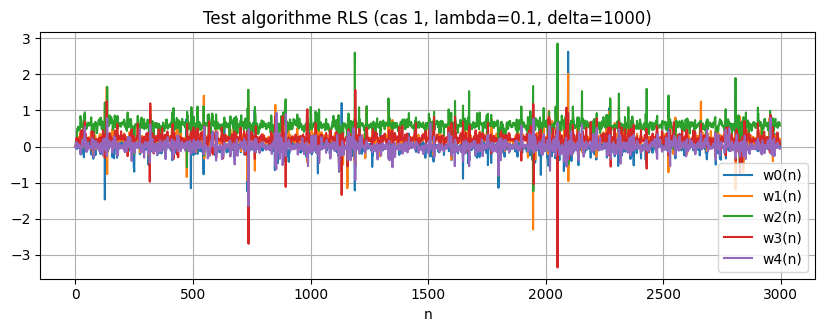

Réponse impulsionnelle utilisée : [1.84796815e-18 2.03712369e-01 5.92575262e-01 2.03712369e-01
 1.84796815e-18]
W final obtenue : [ 0.00533373  0.21114974  0.58355543  0.06409746 -0.06217483]


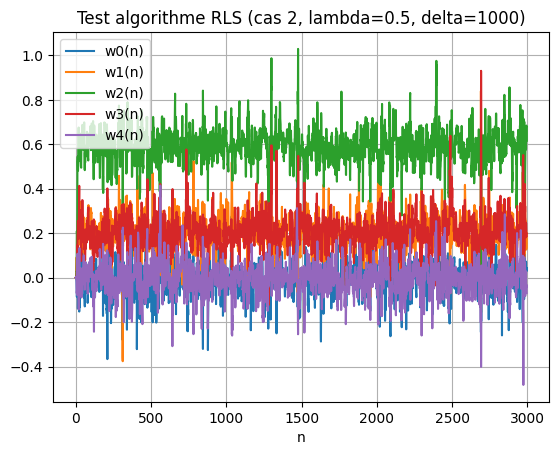

Réponse impulsionnelle utilisée : [1.84796815e-18 2.03712369e-01 5.92575262e-01 2.03712369e-01
 1.84796815e-18]
W final obtenue : [ 0.04361065  0.19900749  0.61580813  0.18723378 -0.0697639 ]


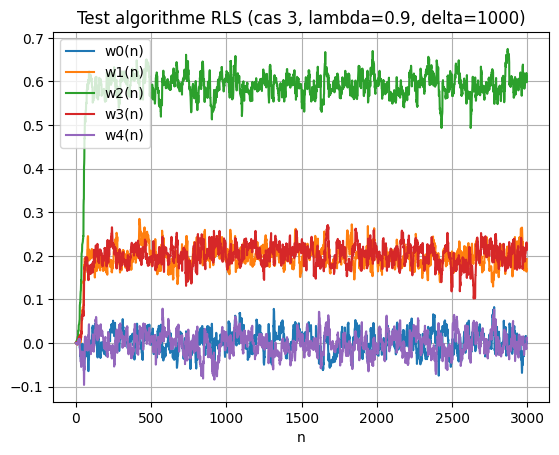

Réponse impulsionnelle utilisée : [1.84796815e-18 2.03712369e-01 5.92575262e-01 2.03712369e-01
 1.84796815e-18]
W final obtenue : [4.13291570e-04 1.92491423e-01 6.11079996e-01 2.13777320e-01
 8.34956855e-03]


In [119]:
plt.figure(figsize=(10,3.2))
for i in range(n_lambda) :
    W = W_list[i]
    Ti, Pi = W.shape

    for p in range(Pi):
        plt.plot(W[:, p], label=f"w{p}(n)")

    plt.title(f"Test algorithme RLS (cas {i+1}, lambda={lambda_list[i]}, delta=1000)")
    plt.xlabel("n")
    plt.legend()
    plt.grid(True)
    plt.show()

    print("Réponse impulsionnelle utilisée :", h_list[i])
    print("W final obtenue :", W[-1])

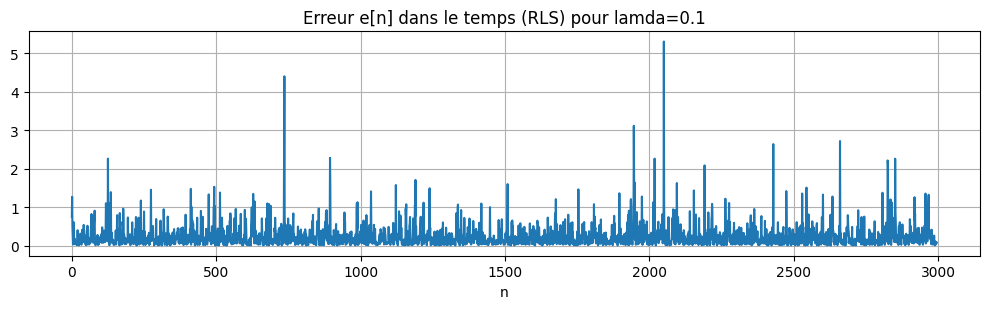

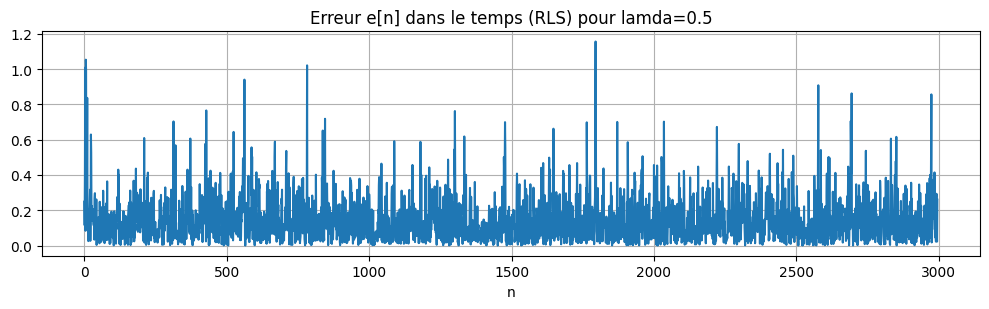

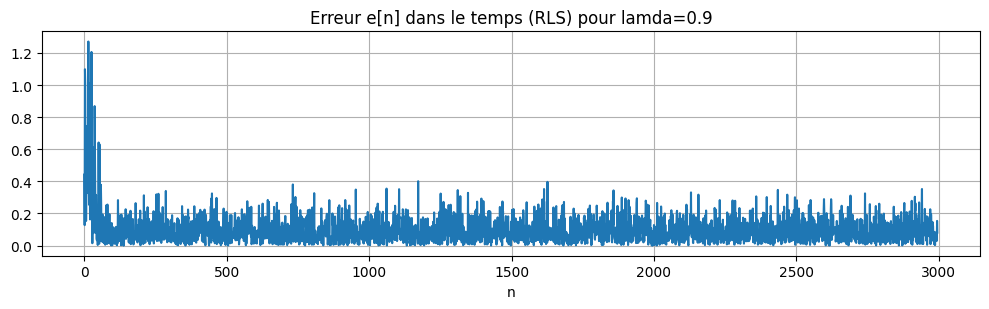

In [120]:
for i in range(n_lambda) :
    E = abs(e_list[i])
    n0 = 5 - 1
    E = E[n0 : ]


    plt.figure(figsize=(10,3.2))
    plt.plot(E, label="e[n]")
    plt.title(f"Erreur e[n] dans le temps (RLS) pour lamda={lambda_list[i]}")
    plt.xlabel("n")
    plt.grid(True); plt.tight_layout(); plt.show()

## Partie 2

In [121]:
x, d, h = generate_test_signals_2(N = N, variance=variance, rho = 0.5)
P = len(h)
W, y, e = algoms_RLS(x, d, P, lambda_=0.99, delta = 1000)

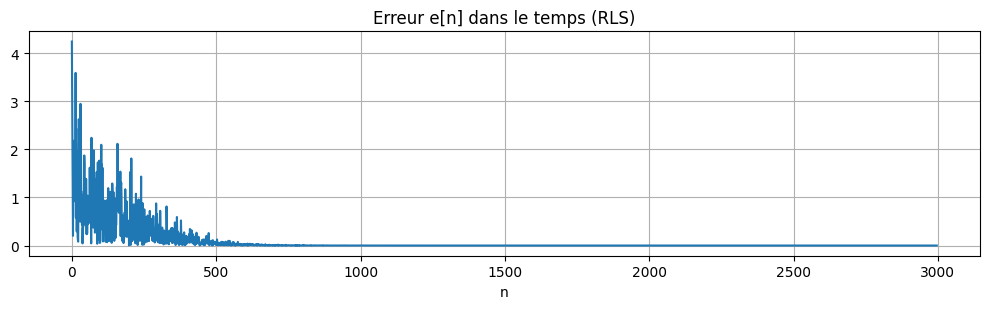

In [122]:
n0 = P - 1
en = e[n0:]


plt.figure(figsize=(10,3.2))
plt.plot(abs(en), label="e[n]")
plt.title("Erreur e[n] dans le temps (RLS)")
plt.xlabel("n")
plt.grid(True); plt.tight_layout(); plt.show()

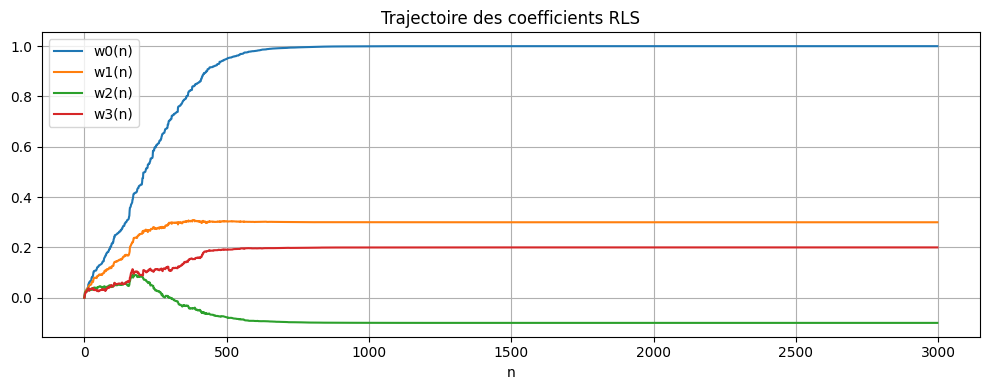

La valeur du filtre h est [ 1.   0.3 -0.1  0.2]
La valeur des poids w est [ 1.   0.3 -0.1  0.2]


In [123]:
plt.figure(figsize=(10, 4))
W= np.array(W, dtype = float)
for k in range(P):
    plt.plot(W[:, k], label=f"w{k}(n)")


plt.title("Trajectoire des coefficients RLS")
plt.xlabel("n")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("La valeur du filtre h est", h)
print("La valeur des poids w est", W[-1])

In [124]:
x, d, h = generate_test_RLS_signals(N=1000, variance_x = 1.0, noise_variance =0.01, P=5, frequency=0.5, rho = 0.5)
P = len(h)
W, y, e = algoms_RLS(x, d, P, lambda_=0.99, delta = 1000)

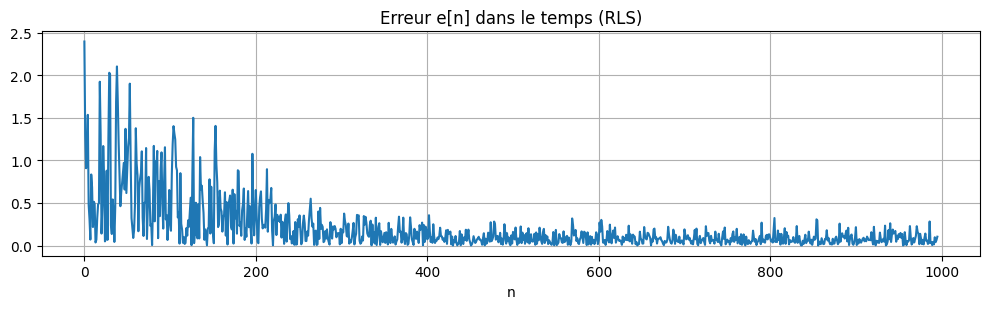

In [125]:
n0 = P - 1
en = e[n0:]


plt.figure(figsize=(10,3.2))
plt.plot(abs(en), label="e[n]")
plt.title("Erreur e[n] dans le temps (RLS)")
plt.xlabel("n")
plt.grid(True); plt.tight_layout(); plt.show()

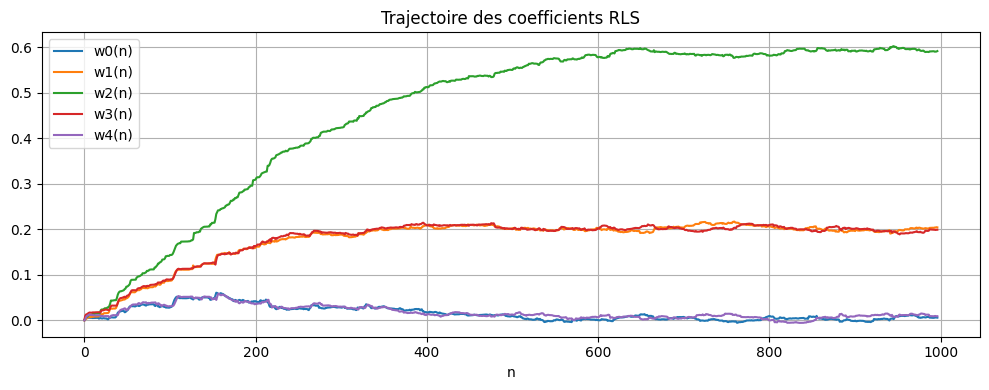

La valeur du filtre h est [1.84796815e-18 2.03712369e-01 5.92575262e-01 2.03712369e-01
 1.84796815e-18]
La valeur des poids w est [0.00576348 0.20405469 0.59140078 0.19892584 0.00899119]


In [126]:
plt.figure(figsize=(10, 4))
W= np.array(W, dtype = float)
for k in range(P):
    plt.plot(W[:, k], label=f"w{k}(n)")


plt.title("Trajectoire des coefficients RLS")
plt.xlabel("n")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("La valeur du filtre h est", h)
print("La valeur des poids w est", W[-1])